# Oceanographic Analysis - CalCOFI

# 2. Data Wrangling
- Collect, organize, define, and clean relevant datasets.

## Data Collection

In [57]:
#Import necessary libraries
import pandas as pd
import numpy as np

# Plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Analysing datetime
from datetime import datetime as dt
from datetime import timedelta

# File system manangement
import os,sys

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

#Interactive Shell
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

#Pandas profiling
from pandas_profiling import ProfileReport

import missingno as msno
import re 

%matplotlib inline

## Workspace

In [2]:
cwd = os.getcwd()
print(cwd)

/Users/asaadkhattab/Documents/DSProjects/OceanographicAnalysisCalCOFI


In [3]:
os.listdir(cwd)
#os.listdir( os.getcwd() )

['.DS_Store',
 'LICENSE',
 '2_DataWrangling.ipynb',
 'README.md',
 '1_ProblemIdentification.ipynb',
 '.gitignore',
 '.ipynb_checkpoints',
 '.git']

## Load the Data from CSV File

In [86]:
# Import CSV file and read the dataset
path = '../data/calcofi/bottle.csv'
df = pd.read_csv(path, encoding= 'latin-1') #parse_dates=True

In [75]:
# Show all columns
pd.set_option('max_columns', None)

#### First 5 rows 

In [76]:
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_Sal,R_DYNHT,R_Nuts,R_Oxy_µmol/Kg,DIC1,DIC2,TA1,TA2,pH1,pH2,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Last 3 rows

In [77]:
df.tail(3)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_Sal,R_DYNHT,R_Nuts,R_Oxy_µmol/Kg,DIC1,DIC2,TA1,TA2,pH1,pH2,DIC Quality Comment
887015,35272,887016,093.4 026.4,20-1911OC-MX-308-2233-09340264-0006A-3,6,17.278,33.6271,6.058,24.39638,110.47,264.11,2.0,3,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.664,NaN,0.587,NaN,0.21,NaN,2.40,NaN,0.000,8.0,0.0,8.0,0.24,NaN,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,6.0,17.28,352.5,0.022,0.24,264.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887016,35272,887017,093.4 026.4,20-1911OC-MX-308-2233-09340264-0010A-7,10,17.177,33.6199,5.985,24.41515,108.91,260.92,NaN,7,2.0,NaN,3.0,6.0,NaN,6.0,6.0,6.0,3.178,NaN,0.708,NaN,0.25,NaN,2.70,NaN,NaN,9.0,0.0,8.0,0.61,NaN,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,17.18,350.8,0.032,0.61,260.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887017,35272,887018,093.4 026.4,20-1911OC-MX-308-2233-09340264-0011A-3,11,17.145,33.6187,5.921,24.42188,107.69,258.13,1.0,3,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.306,NaN,0.738,NaN,0.26,NaN,2.77,NaN,0.028,NaN,0.0,8.0,0.70,NaN,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,11.0,17.14,350.2,0.039,0.70,258.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Convert Celcius to Fahr
def cel_to_fahr(x):
    x = x * 1.8 + 32
    return float(x)

df['TempDegF'] = df['TempDegC'].apply(cel_to_fahr)

In [98]:
# Dimensions of the dataset. #(samples,features)
print("There are", df.shape[0], "Rows(Observations).")
print("There are", df.shape[1], "Columns(Features).")
df.shape

There are 887018 Rows(Observations).
There are 63 Columns(Features).


(887018, 63)

___

## Data Organization

#### Create SubFolders

In [15]:
newfolder = "../OceanographicAnalysisCalCOFI/data"

try:
    os.mkdir(newfolder)
except OSError:
    print ("Creation of the directory %s failed" % newfolder)
else:
    print ("Successfully created the directory %s " % newfolder)

Successfully created the directory ../OceanographicAnalysisCalCOFI/data 


In [16]:
newfolder = "../OceanographicAnalysisCalCOFI/figures"

try:
    os.mkdir(newfolder)
except OSError:
    print ("Creation of the directory %s failed" % newfolder)
else:
    print ("Successfully created the directory %s " % newfolder)

Successfully created the directory ../OceanographicAnalysisCalCOFI/figures 


In [17]:
newfolder = "../OceanographicAnalysisCalCOFI/models"

try:
    os.mkdir(newfolder)
except OSError:
    print ("Creation of the directory %s failed" % newfolder)
else:
    print ("Successfully created the directory %s " % newfolder)

Successfully created the directory ../OceanographicAnalysisCalCOFI/models 


---

## Data Definition

### Explore the Data

In [79]:
# Get DataFrame Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887018 entries, 0 to 887017
Data columns (total 62 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              887018 non-null  int64  
 1   Btl_Cnt              887018 non-null  int64  
 2   Sta_ID               887018 non-null  object 
 3   Depth_ID             887018 non-null  object 
 4   Depthm               887018 non-null  int64  
 5   T_degC               876053 non-null  float64
 6   Salnty               839663 non-null  float64
 7   O2ml_L               717589 non-null  float64
 8   STheta               834327 non-null  float64
 9   O2Sat                682668 non-null  float64
 10  Oxy_µmol/Kg          682657 non-null  float64
 11  BtlNum               133892 non-null  float64
 12  RecInd               887018 non-null  int64  
 13  T_prec               876055 non-null  float64
 14  T_qual               23129 non-null   float64
 15  S_prec           

There are no missing values. AppointmentDay and ScheduledDay should be converted to datetime. There are 3 objects (Gender, Neighborhood, and No-show)

#### Variable Types

In [80]:
df.dtypes.value_counts()

float64    54
int64       4
object      4
dtype: int64

#### Rename Columns

In [81]:
print(df.columns)

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_Sal', 'R_DYNHT', 'R_Nuts',
       'R_Oxy_µmol/Kg', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH1', 'pH2',
       'DIC Quality Comment'],
      dtype='object')


In [92]:
df = df.rename(columns = { "Salnty":"Salinity", 
                          "T_degC": "TempDegC"
                         })

In [94]:
column_names = ["Salinity", "TempDegC", "TempDegF"]

saltemp = df.reindex(columns=column_names)

In [95]:
saltemp.head()

,Salinity,TempDegC,TempDegF
0,33.440,10.50,50.900
1,33.440,10.46,50.828
2,33.437,10.46,50.828
3,33.420,10.45,50.810
4,33.421,10.45,50.810


#### Count of unique values or codes

In [96]:
df.count()

Cst_Cnt                887018
Btl_Cnt                887018
Sta_ID                 887018
Depth_ID               887018
Depthm                 887018
                        ...  
TA2                       234
pH1                        84
pH2                        10
DIC Quality Comment        55
TempDegF               876053
Length: 63, dtype: int64

In [97]:
print('Salinity:', df.Salinity.unique() ) 
print('TempDegC:', df.TempDegC.unique() ) 
print('TempDegF:', df.TempDegF.unique() ) 

Salinity: [33.44   33.437  33.42   ... 34.0373 33.8616 33.7855]
TempDegC: [10.5   10.46  10.45  ... 20.249 20.252 17.278]
TempDegF: [50.9    50.828  50.81   ... 68.4482 68.4536 63.1004]


## Dataset Statistics

In [41]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Cst_Cnt,887018,NaN,NaN,NaN,17581,10483,1,8462,17463,27190,35272
Btl_Cnt,887018,NaN,NaN,NaN,443510,256060,1,221755,443510,665264,887018
Sta_ID,887018,2634,090.0 070.0,10417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Depth_ID,887018,886996,20-16045S-MX-110-1421-06670900-0100A-3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Depthm,887018,NaN,NaN,NaN,225.038,313.2,0,45,125,300,5351
...,...,...,...,...,...,...,...,...,...,...,...
TA1,2084,NaN,NaN,NaN,2256.06,34.8444,2181.57,2230.32,2244.32,2278.51,2434.9
TA2,234,NaN,NaN,NaN,2278.86,58.4965,2198.15,2229.06,2247.51,2316.45,2437
pH1,84,NaN,NaN,NaN,7.91098,0.0776661,7.6183,7.89868,7.92885,7.9551,8.0477
pH2,10,NaN,NaN,NaN,7.94857,0.021216,7.9231,7.93147,7.94665,7.9633,7.9883


In [42]:
df["Salinity"].describe(include="all").T

count    839663.000000
mean         33.837784
std           0.459417
min          28.365200
25%          33.487000
50%          33.860000
75%          34.191200
max          37.034000
Name: Salinity, dtype: float64

In [43]:
df["TempDegC"].describe(include="all").T

count    876053.000000
mean         10.814543
std           4.233482
min           1.440000
25%           7.700000
50%          10.070000
75%          13.900000
max          31.140000
Name: TempDegC, dtype: float64

___

## Handling Missing Data

In [44]:
#Get summary of missingness
df.isna().sum()

#df.notnull().any()
#df.isnull().values.any() 

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    884934
TA2                    886784
pH1                    886934
pH2                    887008
DIC Quality Comment    886963
Length: 62, dtype: int64

In [45]:
print ( df.nunique() / df.shape[0] * 100 )

Cst_Cnt                  3.976469
Btl_Cnt                100.000000
Sta_ID                   0.296950
Depth_ID                99.997520
Depthm                   0.362901
                          ...    
TA1                      0.208451
TA2                      0.025366
pH1                      0.009244
pH2                      0.001127
DIC Quality Comment      0.004171
Length: 62, dtype: float64


In [46]:
#Counts of null values 
na_df = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount'] > 0)]

,VarName,NullCount
0,pH2,887008
1,DIC Quality Comment,886963
2,pH1,886934
3,DIC2,886794
4,TA2,886784
5,DIC1,885019
6,TA1,884934
7,C14A2p,874276
8,C14A1p,874258
9,C14As2,871596


<AxesSubplot:>

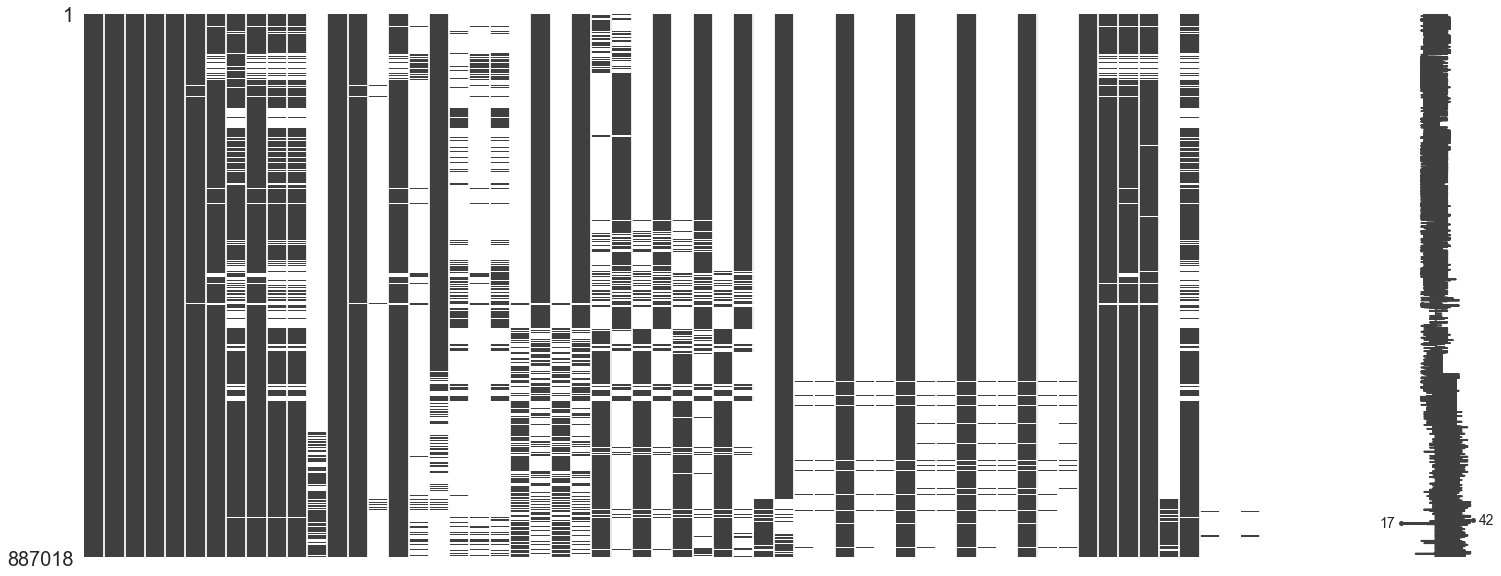

In [47]:
# Visualize Missingness
msno.matrix(df)
plt.show()

In [13]:
# df = df.fillna(axis=0,method='ffill')
# df[''].fillna((df[''].mean()), inplace=True)

---

### Detect Anomalies & Outliers

#### Range of values per column

In [60]:
range = df.aggregate([min, max])
print(range)

     Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
min        1        1  001.0 168.0  19-4903CR-HY-060-0930-05400560-0000A-3   
max    35272   887018  176.7 030.0  20-93.3OC-MX-311-1010-09331100-0515A-3   

     Depthm  TempDegC  Salinity  O2ml_L   STheta  O2Sat  Oxy_µmol/Kg  BtlNum  \
min       0      1.44   28.3652   -0.01   20.934   -0.1      -0.4349     0.0   
max    5351     31.14   37.0340   11.13  250.784  214.1     485.7018    25.0   

     RecInd  T_prec  T_qual  S_prec  S_qual  P_qual  O_qual  SThtaq  O2Satq  \
min       3     1.0     6.0     2.0     6.0     6.0     6.0     6.0     2.0   
max       7     9.0     9.0     3.0     9.0     9.0     9.0     9.0     9.0   

     ChlorA  Chlqua  Phaeop  Phaqua  PO4uM  PO4q  SiO3uM  SiO3qu  NO2uM  NO2q  \
min  -0.001     8.0   -3.89     8.0   0.00   4.0     0.0     4.0   0.00   4.0   
max  66.110     9.0   65.30     9.0   5.21   9.0   196.0     9.0   8.19   9.0   

     NO3uM  NO3q  NH3uM  NH3q  C14As1  C14

## DATA CLEANING

## Check for Duplicated Rows

In [49]:
column_names = [""] 

duplicateRowsDF = df.duplicated(subset=column_names, keep = False) 
df[duplicateRowsDF].sort_values(by='').head(6)

#df.drop_duplicates(inplace=True)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSSent,NoShow,WaitingDays,ScheduledTime,ScheduledHour,ScheduledDayWeekDay,AppointmentDayWeekName,ScheduledDayMonthName,AppointmentDayMonthName
88585,22638656,F,2016-05-18 13:37:12,2016-06-08 00:00:00,23,INHANGUETÁ,0,0,0,0,0,1,No,20,13:37:12,13,Wednesday,Wednesday,May,June
58616,22638656,F,2016-04-14 07:23:30,2016-05-03 00:00:00,22,INHANGUETÁ,0,0,0,0,0,1,No,18,07:23:30,7,Thursday,Tuesday,April,May
49826,52168938,F,2016-04-20 11:22:15,2016-05-17 00:00:00,28,JARDIM DA PENHA,0,0,0,0,0,0,No,26,11:22:15,11,Wednesday,Tuesday,April,May
83628,52168938,F,2016-05-16 16:42:19,2016-05-16 16:42:19,28,JARDIM DA PENHA,0,0,0,0,0,0,No,0,16:42:19,16,Monday,Monday,May,May
6674,64851211,F,2016-05-13 16:22:26,2016-05-17 00:00:00,29,MARUÍPE,0,0,0,0,0,0,No,3,16:22:26,16,Friday,Tuesday,May,May
11009,64851211,F,2016-05-11 07:28:23,2016-05-13 00:00:00,29,MARUÍPE,0,0,0,0,0,0,Yes,1,07:28:23,7,Wednesday,Friday,May,May


<div class="alert alert-block alert-warning">
<b>Note:</b> .
</div>

---

## Data Wrangling Summary

### Categorical columns and their associated levels.

In [50]:
dfo = df.select_dtypes(include=['object'], exclude=['datetime'])
dfo.shape
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending = False)

(887018, 4)

,VarName,LevelsCount
1,Depth_ID,886996
0,Sta_ID,2634
2,IncTim,202
3,DIC Quality Comment,37


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887018 entries, 0 to 887017
Data columns (total 62 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              887018 non-null  int64  
 1   Btl_Cnt              887018 non-null  int64  
 2   Sta_ID               887018 non-null  object 
 3   Depth_ID             887018 non-null  object 
 4   Depthm               887018 non-null  int64  
 5   TempDegC             876053 non-null  float64
 6   Salinity             839663 non-null  float64
 7   O2ml_L               717589 non-null  float64
 8   STheta               834327 non-null  float64
 9   O2Sat                682668 non-null  float64
 10  Oxy_µmol/Kg          682657 non-null  float64
 11  BtlNum               133892 non-null  float64
 12  RecInd               887018 non-null  int64  
 13  T_prec               876055 non-null  float64
 14  T_qual               23129 non-null   float64
 15  S_prec           

In [52]:
df.sort_index(axis=1, ascending=True).sample(5)

,BtlNum,Btl_Cnt,C14A1p,C14A1q,C14A2p,C14A2q,C14As1,C14As2,ChlorA,Chlqua,...,SiO3qu,SiO3uM,Sta_ID,TA1,TA2,T_prec,T_qual,TempDegC,pH1,pH2
787136,10.0,787137,NaN,9.0,NaN,9.0,NaN,NaN,0.02,NaN,...,NaN,17.8,080.0 080.0,NaN,NaN,2.0,NaN,10.18,NaN,NaN
49966,NaN,49967,NaN,9.0,NaN,9.0,NaN,NaN,NaN,9.0,...,9.0,NaN,096.7 080.0,NaN,NaN,2.0,NaN,11.40,NaN,NaN
831016,17.0,831017,NaN,9.0,NaN,9.0,NaN,NaN,0.66,NaN,...,NaN,3.6,093.3 070.0,NaN,NaN,2.0,NaN,13.70,NaN,NaN
21210,NaN,21211,NaN,9.0,NaN,9.0,NaN,NaN,NaN,9.0,...,9.0,NaN,044.0 049.0,NaN,NaN,2.0,NaN,10.95,NaN,NaN
438642,NaN,438643,NaN,9.0,NaN,9.0,NaN,NaN,NaN,9.0,...,9.0,NaN,090.0 053.0,NaN,NaN,2.0,NaN,6.38,NaN,NaN


## EXPORT DATA...

In [54]:
#To CSV
df.to_csv('data/wrangle_csv.csv', index=False)

In [55]:
#To Excel
df.to_excel('data/wrangle_excel.xlsx', sheet_name='NewSheet')

#To ClipBoard
df.to_clipboard()

In [56]:
#To HTML
df.to_html('data/wrangle_html.html')

In [57]:
#To SQL
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')
df.to_sql('sql_table',engine, index=False)

sqldf = pd.read_sql('sql_table',con=engine)

In [58]:
#Pandas Profiling
profile = ProfileReport(df, title='Medical Appointment NoShows Profiling Report', minimal=True)
profile.to_file("data/wrangle_profiling.html")